# Import Dataset

In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Data Exploration

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from random import randint

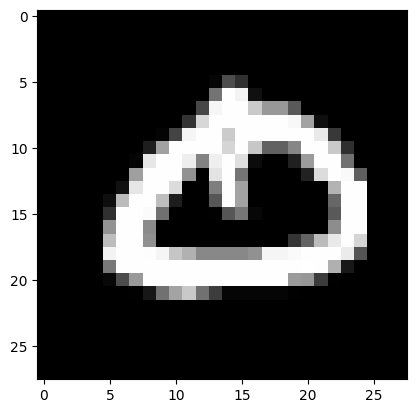

In [5]:
s = randint(0,60_000)
plt.imshow(X_train[s], cmap='gray')

In [6]:
# reshape the data by flattering each image to a flat vectror
X_train, X_test = X_train.reshape(-1, 784),X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [7]:
# train the model
model = GaussianNB(var_smoothing=0.1)
model.fit(
    X_train,
    y_train
)

print(f"[~] train acc: {model.score(X_train, y_train)}")
print(f"[~] test acc: {model.score(X_test, y_test)}")

[~] train acc: 0.8013
[~] test acc: 0.814


Some pixels are bound to always be black. This implies a variance of zero, which in turns means dividing by zero. This is why we induce variance.

In [8]:
model = BernoulliNB()
model.fit(X_train, y_train)
print(f"[~] train acc: {model.score(X_train, y_train)}")
print(f"[~] test acc: {model.score(X_test, y_test)}")

[~] train acc: 0.83125
[~] test acc: 0.8413


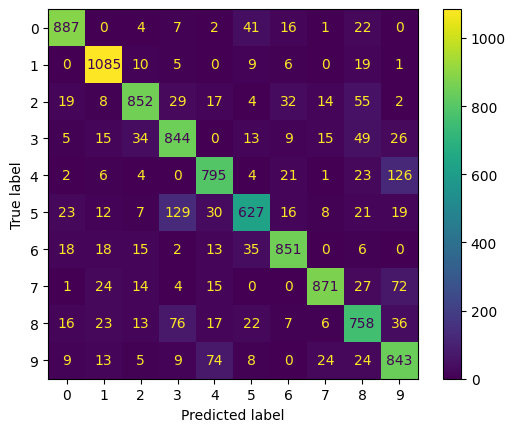

In [9]:
p_test = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, p_test)

From the confusion matrix, we can see that there are many misslabelled samples. For example, the 4 and 9 get confused a lot, which kinda makes sense. Next, we will try to compare the variances across different target values in order to determine which features have a variance = 0 for each class value.

Text(0.5, 1.0, 'True label: 5 Predicted: 3')

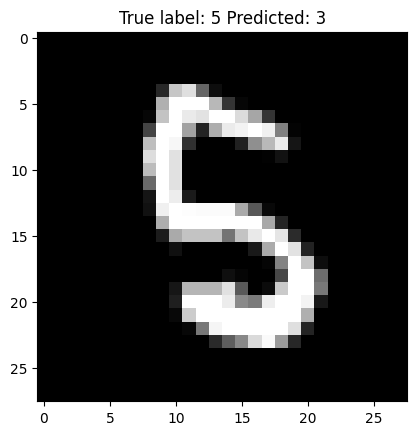

In [10]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title(f"True label: {y_test[i]} Predicted: {p_test[i]}")

In [11]:
# which columns have 0 variance
variances = np.var(X_train, axis=0) # compute the variances per columns
variances.shape

(784,)

In [12]:
np.where(variances == 0) # indexes of the columns with 0 variance

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  16,
         17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  52,  53,  54,  55,  56,  57,  82,  83,  84,  85, 111,
        112, 140, 141, 168, 476, 560, 644, 645, 671, 672, 673, 699, 700,
        701, 727, 728, 729, 730, 754, 755, 756, 757, 758, 759, 780, 781,
        782, 783]),)

In [13]:
zero_variances = np.zeros(784, dtype=bool)


for c in range(0, 10):
  # get only the samples belonging to this class
  x = X_train[y_train == c]
  # check which have zero variance
  variances = np.var(x, axis=0)
  idx_zero_var = np.where(variances == 0)[0]
  # set those indices to 1
  zero_variances[idx_zero_var] = 1

In [14]:
zero_variances.sum() # this is the amount of columns that we can remove

359

In [15]:
X_train2, X_test2 = X_train[:, ~zero_variances], X_test[:, ~zero_variances]

In [16]:
model = BernoulliNB()
model.fit(X_train, y_train)
print(f"[~] train acc: {model.score(X_train, y_train)}")
print(f"[~] test acc: {model.score(X_test, y_test)}")

[~] train acc: 0.83125
[~] test acc: 0.8413


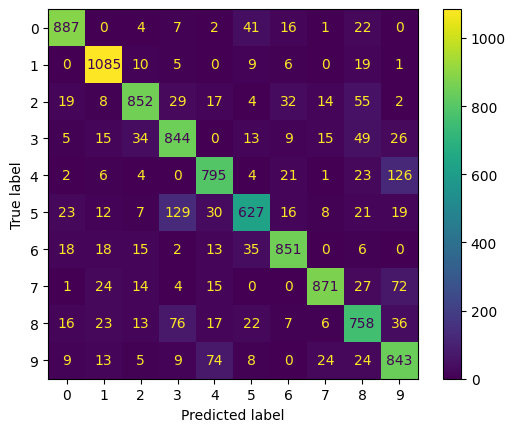

In [17]:
p_test = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, p_test)